In [ ]:
import numpy
a=numpy.zeros([3,2]);
print(a);

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
import numpy
numpy.random.rand(3,3)-0.5

array([[-0.33038028, -0.15532502, -0.14859271],
       [ 0.31366615,  0.23166125,  0.03242001],
       [ 0.05319462, -0.49673627, -0.15693124]])

In [ ]:
a[0,0]=1;
a[0,1]=2;
a[1,0]=3;
a[1,1]=4;
a[2,0]=5;
a[2,1]=6;
print(a);

[[1. 2.]
 [3. 4.]
 [5. 6.]]


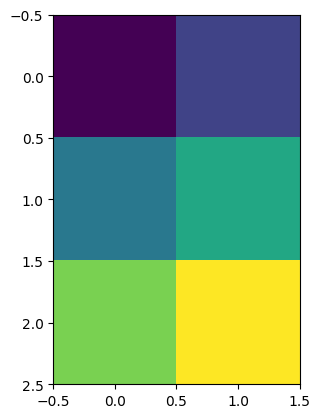

In [ ]:
import matplotlib.pyplot;
matplotlib.pyplot.imshow(a,interpolation="nearest")

# **`Neural Network start from here by just Numpy and Python (scratch) `**

In [43]:
import scipy.special
import matplotlib.pyplot
import numpy
class neuralNetwork:
  # Initialise the input,hidden,output
  def __init__(self,inputnode,hiddennode,outputnode,learningrate):
    self.inode=inputnode
    self.hnode=hiddennode
    self.onode=outputnode
    self.lr=learningrate

    self.wih=numpy.random.normal(0.0,pow(self.hnode,-0.5),(self.hnode,self.inode))
    self.woh=numpy.random.normal(0.0,pow(self.onode,-0.5),(self.onode,self.hnode))
    self.activation_function = lambda x : scipy.special.expit(x)
    pass

  # Train the neural network
  def train(self,input_list,target_list):
    input = numpy.array(input_list,ndmin=2).T
    target = numpy.array(target_list,ndmin=2).T

    hidden_input = numpy.dot(self.wih,input)
    hidden_output = self.activation_function(hidden_input)

    final_input = numpy.dot(self.woh,hidden_output)
    final_output = self.activation_function(final_input)

    output_error = target-final_output
    hidden_error = numpy.dot(self.woh.T,output_error)

    self.woh += self.lr * numpy.dot((output_error * final_output * (1.0 - final_output)),numpy.transpose(hidden_output))
    self.wih += self.lr * numpy.dot((hidden_error * hidden_output * (1.0 - hidden_output)),numpy.transpose(input))
    pass

  # Query the neural network
  def query(self,input_list):
    input = numpy.array(input_list,ndmin=2).T
    hidden_input = numpy.dot(self.wih,input)
    hidden_output = self.activation_function(hidden_input)

    final_input = numpy.dot(self.woh,hidden_output)
    final_output = self.activation_function(final_input)
    return final_output


In [44]:
input_node = 784
hidden_node = 100
output_node = 10
learning_rate = 0.3
n = neuralNetwork(input_node,hidden_node,output_node,learning_rate)
# n.query([1.0,0.5,-1.5])


In [3]:
training_data_files = open("mnist_train_100.csv","r")
training_data_list = training_data_files.readlines()
training_data_files.close()

In [4]:
len(training_data_list)

100

In [5]:
training_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
epoch = 2
for e in range(epoch):
  for records in training_data_list:
    all_values = records.split(",")
    input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    target = numpy.zeros(output_node) + 0.01
    target[int(all_values[0])] = 0.99
    n.train(input,target)
  pass
pass

In [7]:
test_data_file = open("mnist_test_10.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [37]:
all_values = test_data_list[5].split(",")
print(all_values[0])

1


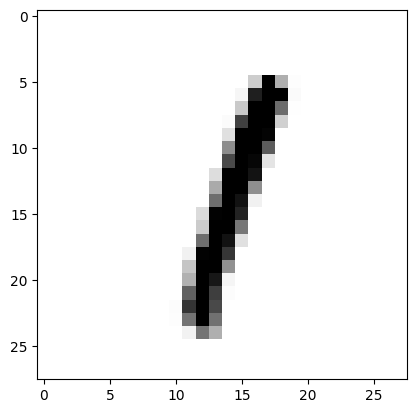

In [38]:
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

In [39]:
n.query((numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)

array([[0.01353156],
       [0.96681712],
       [0.05367778],
       [0.07536783],
       [0.01855063],
       [0.04265803],
       [0.00258487],
       [0.06274998],
       [0.05440391],
       [0.00777325]])

In [40]:
scorecard = []
for record in test_data_list:
  all_values = record.split(",")
  correct_label = int(all_values[0])
  input = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
  output = n.query(input)
  label = numpy.argmax(output)
  if(label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
pass

In [41]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [42]:
score_array = numpy.asarray(scorecard)
performance = score_array.sum() / score_array.size
print("Acccuracy is : ",performance * 100)

Acccuracy is :  70.0
